In [639]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import matplotlib

matplotlib.rcParams['figure.figsize'] = (6, 6)
matplotlib.rcParams['image.cmap'] = 'gray'


[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


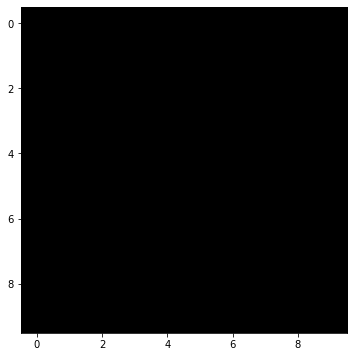

In [640]:
im = np.zeros((10, 10), dtype='uint8')
plt.imshow(im)
print(im)

[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]]


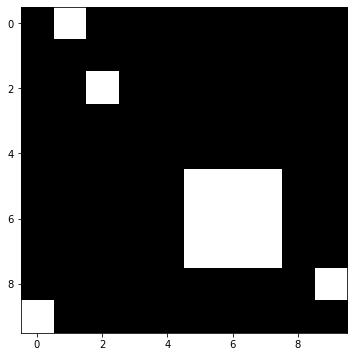

In [641]:
im[0, 1] = 1
im[-1, 0] = 1
im[-2, -1] = 1
im[2, 2] = 1
im[5:8, 5:8] = 1

plt.imshow(im)
print(im)

In [642]:
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
print(element)

#plt.imshow(element)
ksize = element.shape[0]
height, width = im.shape[:2]

[[0 1 0]
 [1 1 1]
 [0 1 0]]


[[1 1 1 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 1]]


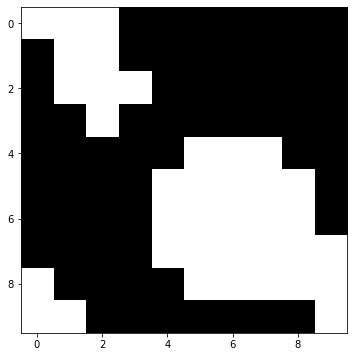

In [643]:
dilatedEllipseKernel = cv2.dilate(im, element)
print(dilatedEllipseKernel)
plt.imshow(dilatedEllipseKernel)

[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


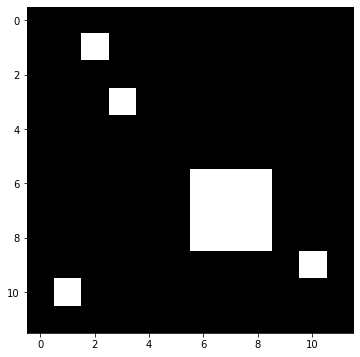

In [644]:
border = ksize // 2

paddedIm = np.zeros((height + border * 2, width + border * 2))
paddedIm = cv2.copyMakeBorder(im, border, border, border, border, cv2.BORDER_CONSTANT, value=0)
paddedDilatedIm = paddedIm.copy()
plt.imshow(paddedDilatedIm)
print(paddedDilatedIm)


In [645]:
# Create a VideoWriter object
# Use frame size as 50x50
out = cv2.VideoWriter(
    'dilationScratch.avi',
    cv2.VideoWriter_fourcc('M','J','P','G'),
    10,
    (50,50)
)
plt.figure(figsize=[10, 10])
for h_i in range(border, height + border):
    for w_i in range(border, width + border):
        roi = paddedIm[h_i - border:h_i + border + 1, w_i - border:w_i + border + 1]
        cx = int(((h_i - border) + (h_i + border + 1)) // 2)
        cy = int(((w_i - border) + (w_i + border + 1)) // 2)
        if not paddedIm[cx, cy]:
            ops = cv2.bitwise_and(roi, element)
            if np.amax(ops):
                paddedDilatedIm[cx, cy] = np.amax(ops)
                # Resize output to 50x50 before writing it to the video
                frame = paddedDilatedIm[:,:,None]*1*np.empty(3,dtype='uint8')[None,None,:]
                frames = cv2.resize(frame,(50,50),interpolation=cv2.INTER_NEAREST)

                # Convert resizedFrame to BGR before writing
                frames = cv2.cvtColor(frames,cv2.COLOR_BGR2GRAY)
                (thresh, im_bw) = cv2.threshold(frames, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
                frame3d = cv2.merge((im_bw,im_bw,im_bw))
                out.write(frame3d)

# Release the VideoWriter object
out.release()

<Figure size 720x720 with 0 Axes>

[[1 1 1 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 1]]


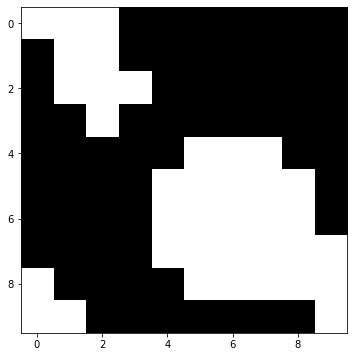

In [646]:
# Display final image (cropped)
dilatedImage = paddedDilatedIm[border:border + height, border:border + width]
print(dilatedImage)
plt.imshow(dilatedImage)


<video width="320" height="240" controls>
<source src="dilationScratch.avi" type="video/mp4">
</video>


[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


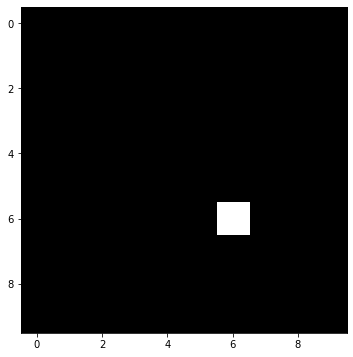

In [647]:
print(im)
ErodedEllipseKernel = cv2.erode(im, element)
print(ErodedEllipseKernel)
plt.imshow(ErodedEllipseKernel);

[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


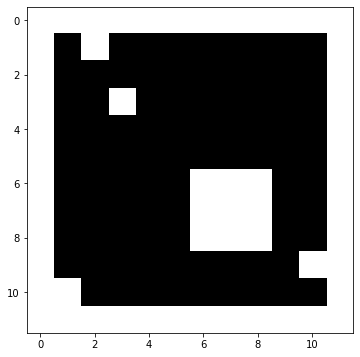

In [648]:
border = ksize//2

paddedIm = np.zeros((height + border*2, width + border*2))
paddedIm = cv2.copyMakeBorder(im, border, border, border, border, cv2.BORDER_CONSTANT, value = 1)
paddedErodedIm = paddedIm.copy()
plt.imshow(paddedErodedIm)
print(paddedErodedIm)

# Create a VideoWriter object
# Use frame size as 50x50
out = cv2.VideoWriter(
    'erosionScratch.avi',
    cv2.VideoWriter_fourcc('M','J','P','G'),
    10,
    (50,50)
)

for h_i in range(border, height+border):
    for w_i in range(border,width+border):
        roi = paddedIm[h_i - border:h_i + border + 1, w_i - border:w_i + border + 1]
        cx = int(((h_i - border) + (h_i + border + 1)) // 2)
        cy = int(((w_i - border) + (w_i + border + 1)) // 2)
        if paddedIm[cx, cy]:
            ops = cv2.bitwise_or(roi, element)
            if not np.amin(ops):
                paddedErodedIm[cx, cy] = np.amin(ops)
                # Resize output to 50x50 before writing it to the video
                frame = paddedErodedIm[:,:,None]*1*np.empty(3,dtype='uint8')[None,None,:]
                frames = cv2.resize(frame,(50,50),interpolation=cv2.INTER_NEAREST)

                # Convert resizedFrame to BGR before writing
                frames = cv2.cvtColor(frames,cv2.COLOR_BGR2GRAY)
                (thresh, im_bw) = cv2.threshold(frames, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
                frame3d = cv2.merge((im_bw,im_bw,im_bw))
                out.write(frame3d)

out.release()

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


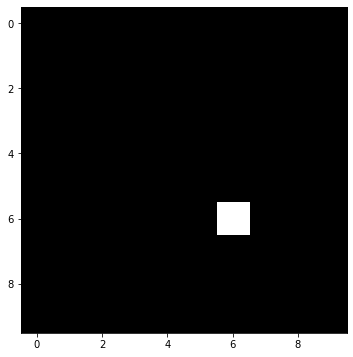

In [649]:
# Display final image (cropped)
erodedImage = paddedErodedIm[border:border + height, border:border + width]
print(erodedImage)
plt.imshow(erodedImage)

<video width="320" height="240" controls>
  <source src="method2.mp4" type="video/mp4">
</video>